# customer segmentation for a UK-based non-store online retail.

Credits: https://archive.ics.uci.edu/ml/datasets/online+retail
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Why Customer Segmentation?
While businesses strive hard to satisfy all the customers that come to them, it is important that they identify their loyal and regular customers who bring in a big portion of regular revenue.
Customer Segmentation has been a proven tool to help businesses learn more about their customers. Traditional segmentation methods involve demographical and psychographical strategies which may not be accurate in today's market.

RFM based analysis and segmentation gives a quantitative approach to understanding customers.
RFM stands for 'RECENCY','FREQUENCY' and 'MONETARY'.
This analysis helps us identify 3 segments of customers typically - 'Low Value','Mid Value' and 'High Value'.
    

In [41]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('Online_Retail.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


The dataset has the transactions fromt the following countries

In [6]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Getting an idea how many transactions under each country

In [7]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

It would be good to analyze the UK data as we have 495478 rows when compared to the rest of the countries. 

In [8]:
UK_customers = data.query("Country=='United Kingdom'").reset_index(drop=True)

In [9]:
UK_customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


RFM segmentation:
RFM segmentation is a proven method to identify groups of customers for special treatment.
R - Receny(how recent the customer has done transactions), F - Frequency(how frequently the customer has done transactions) and M - Monetary(how much money the customer brings in).
RFM better than some of the traditional segmentation methods because of the use of RFM variables rather than demographic or psychographic variables

In [10]:
UK_customers['CustomerID'].value_counts()

17841.0    7983
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
           ... 
17923.0       1
17925.0       1
16881.0       1
15753.0       1
17307.0       1
Name: CustomerID, Length: 3950, dtype: int64

# Recency
We will group the data based on the CustomerID to see each customer's transactions(InvoiceDate). Then we can get the most recent purchase using the max() function


In [11]:
recent_purchase = UK_customers.groupby('CustomerID').InvoiceDate.max().reset_index()

In [12]:
recent_purchase.columns=['CustomerID','MaxPurchaseDate']

In [13]:
#recency in days
recent_purchase['Recency'] = (recent_purchase['MaxPurchaseDate'].max() - recent_purchase['MaxPurchaseDate']).dt.days

In [14]:
recent_purchase

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,277
3946,18281.0,2011-06-12 10:53:00,180
3947,18282.0,2011-12-02 11:43:00,7
3948,18283.0,2011-12-06 12:02:00,3


# Frequency

We will group the data based on the CustomerID to see each customer's transactions(InvoiceDate) count . Then we can get the frequency of purchase for each customer.

In [15]:
purchase_freq = UK_customers.groupby('CustomerID').InvoiceDate.count().reset_index()
purchase_freq.columns = ['CustomerID','Frequency']

In [16]:
purchase_freq

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59
...,...,...
3945,18280.0,10
3946,18281.0,7
3947,18282.0,13
3948,18283.0,756


# Monetary Revenue
First of, we will calcuate the revenue for each transaction by multiplying the Unit price with the quantity sold.
Then we will group the data based on the CustomerID to see the revenue brought in by each customer.

In [17]:
UK_customers['Revenue'] = UK_customers['UnitPrice']*UK_customers['Quantity']

In [18]:
monetary_rev = UK_customers.groupby('CustomerID').Revenue.sum().reset_index()
monetary_rev.columns = ['CustomerID','Monetary_Revenue']

In [19]:
monetary_rev

,CustomerID,Monetary_Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34
...,...,...
3945,18280.0,180.60
3946,18281.0,80.82
3947,18282.0,176.60
3948,18283.0,2094.88


# Consolidation of RFM values and Analysis

Consolidating the calculated RFM values for each customer.

In [20]:
Customer_RFM = pd.merge(recent_purchase,purchase_freq,on='CustomerID')
Customer_RFM = pd.merge(Customer_RFM,monetary_rev,on='CustomerID')

In [21]:
Customer_RFM.drop('MaxPurchaseDate',axis=1)

,CustomerID,Recency,Frequency,Monetary_Revenue
0,12346.0,325,2,0.00
1,12747.0,1,103,4196.01
2,12748.0,0,4642,29072.10
3,12749.0,3,231,3868.20
4,12820.0,2,59,942.34
...,...,...,...,...
3945,18280.0,277,10,180.60
3946,18281.0,180,7,80.82
3947,18282.0,7,13,176.60
3948,18283.0,3,756,2094.88


In [22]:
Customer_RFM['Recency'].describe()

count    3950.000000
mean       90.778481
std       100.230349
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [23]:
Customer_RFM['Recency'].median()

49.0

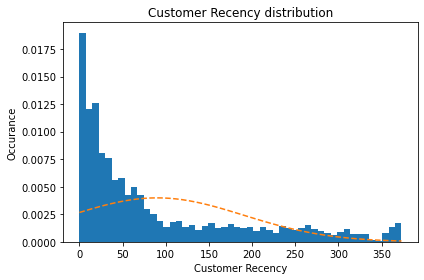

In [24]:
# the histogram of the data
x = Customer_RFM['Recency']
mu = 90 # mean of the distribution
sigma = 100 #Std. deviation of the distribution
num_bins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Customer Recency')
ax.set_ylabel('Occurance')
ax.set_title(r'Customer Recency distribution')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

statistical analysis of the recency numbers show that the median recency is 49.

In [25]:
Customer_RFM['Frequency'].describe()

count    3950.000000
mean       91.614684
std       220.557389
min         1.000000
25%        17.000000
50%        41.000000
75%       101.000000
max      7983.000000
Name: Frequency, dtype: float64

In [26]:
Customer_RFM['Frequency'].median()

41.0

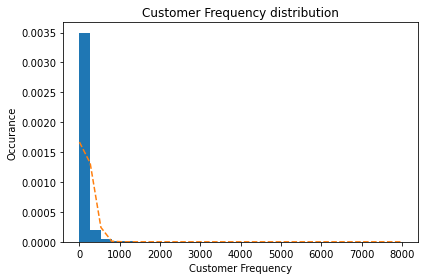

In [35]:
# the histogram of the data
x = Customer_RFM['Frequency']
mu = 91
sigma = 220
num_bins = 30
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Customer Frequency')
ax.set_ylabel('Occurance')
ax.set_title(r'Customer Frequency distribution')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [36]:
Customer_RFM['Monetary_Revenue'].describe()

count      3950.000000
mean       1713.385669
std        6548.608224
min       -4287.630000
25%         282.255000
50%         627.060000
75%        1521.782500
max      256438.490000
Name: Monetary_Revenue, dtype: float64

In [37]:
Customer_RFM['Monetary_Revenue'].median()

627.06

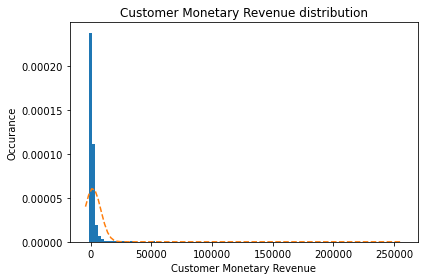

In [40]:
# the histogram of the data
x = Customer_RFM['Monetary_Revenue']
mu = 1713
sigma = 6548
num_bins = 100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Customer Monetary Revenue')
ax.set_ylabel('Occurance')
ax.set_title(r'Customer Monetary Revenue distribution')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Customer Segmentation using k-means clustering

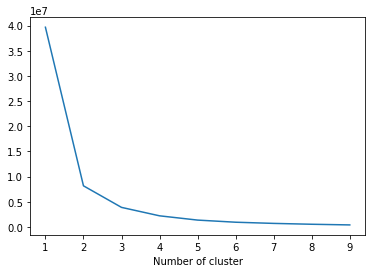

In [42]:
from sklearn.cluster import KMeans

sse={}
tx_recency = Customer_RFM[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Using the elbow method to identify optimal number of clusters for optimal inertia, we can see that 3 or 4 clusters would be ideal.We can go with 4 clusters to aid better overall score calculation in the later part of our analysis.

In [84]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [96]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(Customer_RFM[['Recency']])
Customer_RFM['RecencyCluster'] = kmeans.predict(Customer_RFM[['Recency']])

#order the cluster numbers
Customer_RFM = order_cluster('RecencyCluster', 'Recency',Customer_RFM,False)

In [91]:
#build 4 clusters for Frequency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(Customer_RFM[['Frequency']])
Customer_RFM['FrequencyCluster'] = kmeans.predict(Customer_RFM[['Frequency']])

#order the frequency cluster
Customer_RFM = order_cluster('FrequencyCluster', 'Frequency',Customer_RFM,True)

In [94]:
#build 4 clusters for Revenue and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(Customer_RFM[['Monetary_Revenue']])
Customer_RFM['RevenueCluster'] = kmeans.predict(Customer_RFM[['Monetary_Revenue']])

#order the cluster numbers
Customer_RFM = order_cluster('RevenueCluster', 'Monetary_Revenue',Customer_RFM,True)

In [97]:
Customer_RFM

,CustomerID,MaxPurchaseDate,Recency,Frequency,Monetary_Revenue,FrequencyCluster,RevenueCluster,RecencyCluster
0,12346.0,2011-01-18 10:17:00,325,2,0.00,0,0,0
1,12829.0,2011-01-21 12:56:00,321,12,253.05,0,0,0
2,12831.0,2011-03-22 13:02:00,261,9,215.05,0,0,0
3,12834.0,2011-03-02 09:49:00,282,18,312.38,0,0,0
4,12845.0,2011-03-17 13:34:00,266,27,354.09,0,0,0
...,...,...,...,...,...,...,...,...
3945,17061.0,2011-09-27 11:24:00,73,101,5116.13,0,1,2
3946,15301.0,2011-10-20 09:57:00,50,247,5028.12,1,1,2
3947,16745.0,2011-09-14 11:58:00,86,358,7170.70,1,1,2
3948,16984.0,2011-09-22 18:21:00,77,418,4392.42,1,1,2


# Overall score for each customer

In [98]:
Customer_RFM['OverallScore'] = Customer_RFM['RecencyCluster'] + Customer_RFM['FrequencyCluster'] + Customer_RFM['RevenueCluster']
Customer_RFM.groupby('OverallScore')['Recency','Frequency','Monetary_Revenue'].mean()

<ipython-input-98-d633ca57ed39>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_RFM.groupby('OverallScore')['Recency','Frequency','Monetary_Revenue'].mean()


,Recency,Frequency,Monetary_Revenue
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.170213,32.569149,499.035215
2,78.859630,47.108814,872.074387
3,20.658714,68.293572,1088.690511
4,14.929766,271.481605,3601.606990
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


As we can see from the overall score, 0 is a low value customer, 8 is a high value customer. Hence we can come up with a 
window for the segments

# Assigning segments based on the overall score
1 - low value customers
2 - mid value customers
3 - high value customers

In [102]:
Customer_RFM['Segment'] = 'Low-value'
Customer_RFM.loc[Customer_RFM['OverallScore']>2,'Segment'] = 'Mid-value'
Customer_RFM.loc[Customer_RFM['OverallScore']>4,'Segment'] = 'High-value'

In [103]:
Customer_RFM

,CustomerID,MaxPurchaseDate,Recency,Frequency,Monetary_Revenue,FrequencyCluster,RevenueCluster,RecencyCluster,OverallScore,Segment
0,12346.0,2011-01-18 10:17:00,325,2,0.00,0,0,0,0,Low-value
1,12829.0,2011-01-21 12:56:00,321,12,253.05,0,0,0,0,Low-value
2,12831.0,2011-03-22 13:02:00,261,9,215.05,0,0,0,0,Low-value
3,12834.0,2011-03-02 09:49:00,282,18,312.38,0,0,0,0,Low-value
4,12845.0,2011-03-17 13:34:00,266,27,354.09,0,0,0,0,Low-value
...,...,...,...,...,...,...,...,...,...,...
3945,17061.0,2011-09-27 11:24:00,73,101,5116.13,0,1,2,3,Mid-value
3946,15301.0,2011-10-20 09:57:00,50,247,5028.12,1,1,2,4,Mid-value
3947,16745.0,2011-09-14 11:58:00,86,358,7170.70,1,1,2,4,Mid-value
3948,16984.0,2011-09-22 18:21:00,77,418,4392.42,1,1,2,4,Mid-value


In [113]:
Customer_RFM.to_csv('CustomerRFM_segments.csv')

# Plotting the clusters

Text(0.5, 1.0, 'Scatter plot of Monetary Revenue vs Frequency for different Customer segments')

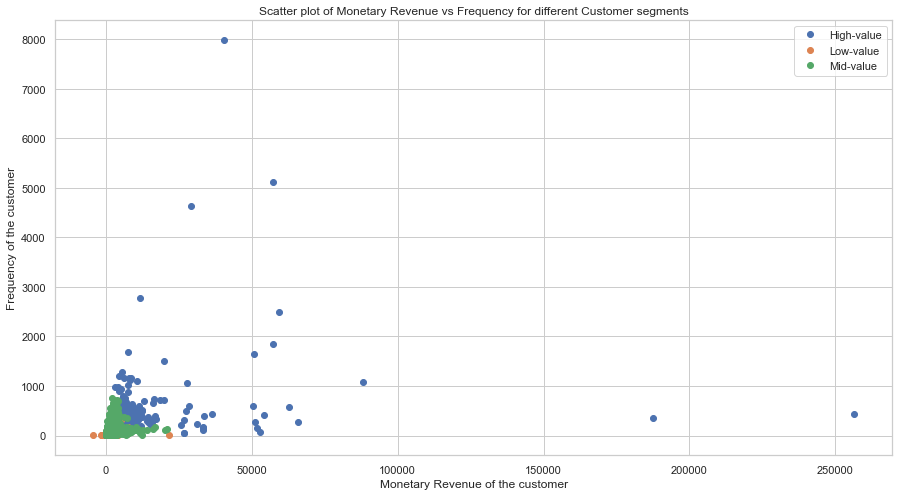

In [110]:
#Revenue vs Frequency
plt.figure(figsize=(15,8))
groups=Customer_RFM.groupby("Segment")
for name, group in groups:
    plt.plot(group['Monetary_Revenue'],group['Frequency'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('Monetary Revenue of the customer')
plt.ylabel("Frequency of the customer")
plt.title('Scatter plot of Monetary Revenue vs Frequency for different Customer segments')

Text(0.5, 1.0, 'Scatter plot of Recency vs Monetary Revenue for different Customer segments')

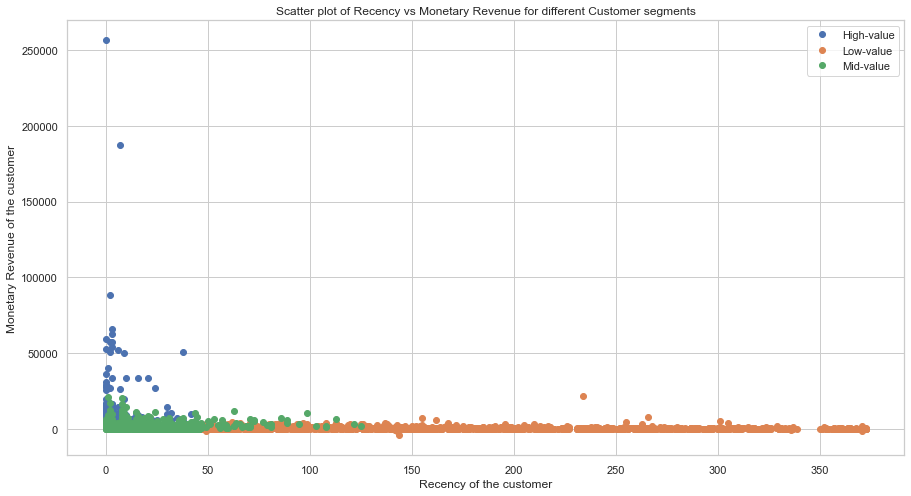

In [111]:
#Revenue vs Frequency
plt.figure(figsize=(15,8))
groups=Customer_RFM.groupby("Segment")
for name, group in groups:
    plt.plot(group['Recency'],group['Monetary_Revenue'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('Recency of the customer')
plt.ylabel("Monetary Revenue of the customer")
plt.title('Scatter plot of Recency vs Monetary Revenue for different Customer segments')

Text(0.5, 1.0, 'Scatter plot of Frequency vs Recency for different Customer segments')

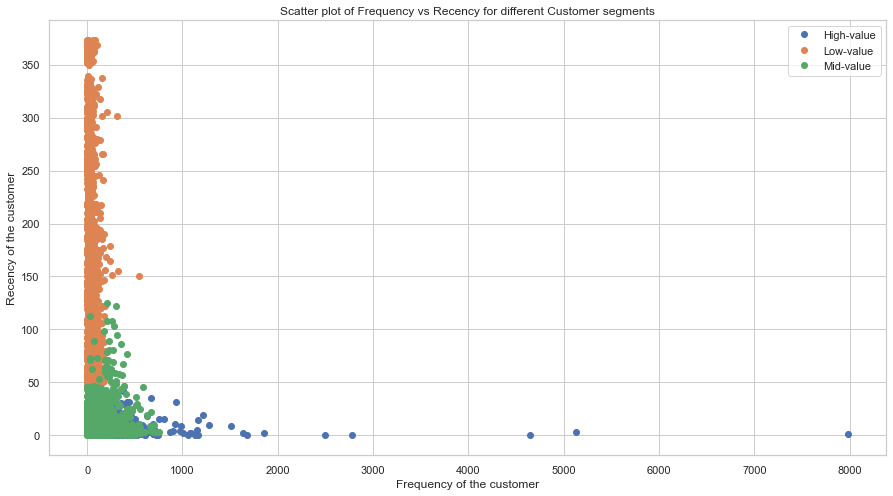

In [112]:
#Frequency vs Recency
plt.figure(figsize=(15,8))
groups=Customer_RFM.groupby("Segment")
for name, group in groups:
    plt.plot(group['Frequency'],group['Recency'],marker='o', linestyle="",label=name)
plt.legend()
plt.xlabel('Frequency of the customer')
plt.ylabel("Recency of the customer")
plt.title('Scatter plot of Frequency vs Recency for different Customer segments')